<a href="https://colab.research.google.com/github/bigirimanainnocent12/Apprentissage_automatique/blob/main/Apprentissage_Automatique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***PROJET DU COURS: APPRENTISSAGE AUTOMATIQUE***

In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# ***1. Chargement et préparation de données réelles***


In [37]:
import kagglehub
import pandas as pd
import os

# Télécharger la dernière version
chemin = kagglehub.dataset_download("thehapyone/uci-online-news-popularity-data-set")

print("Path to dataset files:", chemin)

# Trouver le fichier CSV dans le répertoire téléchargé
for filename in os.listdir(chemin):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(chemin, filename)
        break  # Arrêter après avoir trouvé le premier fichier CSV

# Lire le fichier CSV
DF = pd.read_csv(csv_file_path)
DF.head()


Path to dataset files: /root/.cache/kagglehub/datasets/thehapyone/uci-online-news-popularity-data-set/versions/1


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# ***Déscription de la base de données***

La base de données synthétise une variété de caractéristiques concernant les articles diffusés par Mashable sur une durée de deux ans environ. cet ensemble comprend 61 variables:

1. url : URL de l'article
2. timedelta : Jours entre la publication de l'article et l'acquisition du jeu de données

3. n_tokens_title : Nombre de mots dans le titre (Quantitative)
4. n_tokens_content : Nombre de mots dans le contenu (Quantitative)
5. n_unique_tokens : Taux de mots uniques dans le contenu (Quantitative)
6. n_non_stop_words : Taux de mots non-stop dans le contenu (Quantitative)
7. n_non_stop_unique_tokens : Taux de mots uniques non-stop dans le contenu (Quantitative)
8. num_hrefs : Nombre de liens (Quantitative)
9. num_self_hrefs : Nombre de liens vers d'autres articles publiés par Mashable (Quantitative)
10. num_imgs : Nombre d'images (Quantitative)
11. num_videos : Nombre de vidéos (Quantitative)
12. average_token_length : Longueur moyenne des mots dans le contenu (Quantitative)
13. num_keywords : Nombre de mots-clés dans les métadonnées (Quantitative)
14. data_channel_is_lifestyle : Le canal de données est-il  Lifestyle ? (Binaire)
15. data_channel_is_entertainment : le canal de données est-il  Divertissement? (Binaire)
16. data_channel_is_bus : Le canal de données est-il professionnel  ? (Binaire)
17. data_channel_is_socmed : Le canal de données est-il un  réseau social? (Binaire)
18. data_channel_is_tech : Le canal de données est-il  Tech ? (Binaire)
19. data_channel_is_world : Le canal de données est-il World ? (Binaire)
20. kw_min_min : pire mot-clé (partages min.) (Quantitative)
21. kw_max_min : pire mot-clé (partages max.) (Quantitative)
22. kw_avg_min : pire mot-clé (partages moyens) (Quantitative)
23. kw_min_max : Meilleur mot-clé (min. de partages) (Quantitative)
24. kw_max_max : Meilleur mot-clé (partages max.) (Quantitative)
25. kw_avg_max : Meilleur mot-clé (partages moyens) (Quantitative)
26. kw_min_avg : mot-clé moyen (partages min.) (Quantitative)
27. kw_max_avg : mot-clé moyen (partages max.) (Quantitative)
28. kw_avg_avg : mot-clé moyen (partages moyens) (Quantitative)
29. self_reference_min_shares : nombre minimum de parts d'articles référencés dans Mashable (Quantitative)
30. self_reference_max_shares : nombre maximal de parts d'articles référencés dans Mashable (Quantitative)
31. self_reference_avg_sharess : Moyenne des parts d'articles référencés .dans Mashable (Quantitative)
32. weekday_is_monday : L’article a-t-il été publié un lundi ? (Binaire)
33. weekday_is_tuesday : L'article a-t-il été publié un mardi ? (Binaire)
34. weekday_is_wednesday : L'article a-t-il été publié un mercredi ? (Binaire)
35. weekday_is_thursday : L'article a-t-il été publié un jeudi ? (Binaire)
36. weekday_is_friday : L'article a-t-il été publié un vendredi ? (Binaire)
37. weekday_is_saturday : L'article a-t-il été publié un samedi ? (Binaire)
38. weekday_is_sunday : L'article a-t-il été publié un dimanche ? (Binaire)
39. is_weekend : L'article a-t-il été publié le week-end ? (Binaire)
40. LDA_00 : Proximité avec le sujet LDA 0 (Quantitative)
41. LDA_01 : Proximité avec le thème LDA 1 (Quantitative)
42. LDA_02 : Proximité avec le thème LDA 2 (Quantitative)
43. LDA_03 : Proximité avec le thème 3 de LDA (Quantitative)
44. LDA_04 : Proximité avec le thème LDA 4 (Quantitative)
45. global_subjectivity : subjectivité du texte (Quantitative)
46. global_sentiment_polarity : Polarité des sentiments du texte (Quantitative)
47. global_rate_positive_words : Taux de mots positifs dans le contenu (Quantitative)
48. global_rate_negative_words : Taux de mots négatifs dans le contenu (Quantitative)
49. rate_positive_words : Taux de mots positifs parmi les jetons non neutres (Quantitative)
50. rate_negative_words : Taux de mots négatifs parmi les jetons non neutres (Quantitative)
51. avg_positive_polarity : Polarité moyenne des mots positifs. (Quantitative)
52. min_positive_polarity : Polarité minimale des mots positifs (Quantitative)
53. max_positive_polarity : Polarité max. des mots positifs (Quantitative)
54. avg_negative_polarity : Polarité moyenne des mots négatifs (Quantitative)
55. min_negative_polarity : Polarité minimale des mots négatifs (Quantitative)
56. max_negative_polarity : Polarité max. des mots négatifs (Quantitative)
57. title_subjectivity : Subjectivité du titre (Quantitative)
58. title_sentiment_polarity : Polarité du titre (Quantitative)
59. abs_title_subjectivity : Niveau de subjectivité absolue (Quantitative)
60. abs_title_sentiment_polarity : Niveau de polarité absolu (Quantitative)
61. actions : Nombre d'actions (cible) (Quantitative la réponse)


# Remarque

Nous allons suprimer les variables url et timedelta car ils n'apportent aucune information sur la variable cible "partage".

In [38]:
Df=DF.drop(["url"," timedelta"],axis=1)

Détails des informations de la base de données:


In [39]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 39644 non-null  float64
 1    n_tokens_content               39644 non-null  float64
 2    n_unique_tokens                39644 non-null  float64
 3    n_non_stop_words               39644 non-null  float64
 4    n_non_stop_unique_tokens       39644 non-null  float64
 5    num_hrefs                      39644 non-null  float64
 6    num_self_hrefs                 39644 non-null  float64
 7    num_imgs                       39644 non-null  float64
 8    num_videos                     39644 non-null  float64
 9    average_token_length           39644 non-null  float64
 10   num_keywords                   39644 non-null  float64
 11   data_channel_is_lifestyle      39644 non-null  float64
 12   data_channel_is_entertainment  

# **Remarque**

Premièrement, on va changer le type des variables binaires car dans la base de données, elles sont de type "float64".

In [40]:
variables_qualitative=Df[[' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',' weekday_is_friday',' weekday_is_saturday',' weekday_is_sunday',
                        ' is_weekend',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',
                         ' data_channel_is_world',' data_channel_is_lifestyle' ]].astype('bool')

variables_dicretes=Df[[' n_tokens_title',' n_tokens_content',' num_hrefs',' num_self_hrefs',' num_imgs',' num_videos',' num_keywords']].astype('int64')

variables_quantitative = Df[Df.columns.difference(variables_qualitative.columns.union(variables_dicretes.columns))]

data=pd.concat([variables_quantitative,variables_qualitative,variables_dicretes],axis=1)

# **Vérifications des Valeurs manquantées**

Nous remarquons que dans notre base de données, il n'y a pas des données manquantées.

In [41]:
data.isna().sum()

,0
LDA_00,0
LDA_01,0
LDA_02,0
LDA_03,0
LDA_04,0
abs_title_sentiment_polarity,0
abs_title_subjectivity,0
average_token_length,0
avg_negative_polarity,0
avg_positive_polarity,0


# **Vérifications des Valeurs dupliquées**

Nous remarquons également que dans la base de données, il n'y a pas des articles dupliqués

In [42]:
data.duplicated().sum()

0

# **La variable cible et ses liens avec les variables explicatives considérées une à une.**

# Statistiques descriptives pour la variable cible

D'après les résultats ci dessous;

- Il y a 39 644 valeurs dans la colonne shares. Cela signifie qu'il n'y a pas de valeurs manquantes dans cette variable.
- La moyenne est de 3 395.38. Cela indique que, en moyenne, les articles reçoivent environ 3 395 partages. Cependant, cette moyenne peut être influencée par des valeurs extrêmes (comme la valeur maximale de 843 300).
- L'écart type est de 11 626.95, ce qui est très élevé. Cela reflète une grande dispersion des données autour de la moyenne. En d'autres termes, les articles ont des nombres de partages très variables, certains étant très populaires (avec des partages très élevés) et d'autres beaucoup moins.
- Minimum : La plus petite valeur est 1, ce qui signifie qu'au moins un article a reçu un seul partage.
- Maximum : La plus grande valeur est 843 300, ce qui indique qu'un article a été extrêmement populaire. Cette valeur est très éloignée de la moyenne, ce qui pourrait suggérer un outlier (valeur aberrante).
- Percentiles (25%, 50%, 75%):

* 25% (premier quartile) : 25 % des articles ont 946 partages ou moins.

* 50% (médiane) : La moitié des articles ont 1 400 partages ou moins. Cela suggère que la répartition est asymétrique (car la médiane est bien inférieure à la moyenne).
* 75% (troisième quartile) : 75 % des articles ont 2 800 partages ou moins.

La différence entre le 75e percentile (2 800) et la moyenne (3 395.38) indique que la moyenne est tirée vers le haut par des valeurs très élevées (comme la valeur maximale de 843 300).

# Remarque

La distribution des partages est asymétrique à droite, ce qui signifie qu'une petite proportion d'articles obtient un nombre de partages exceptionnellement élevé, tandis que la majorité reçoit moins de partages.

Il y a une grande variabilité dans les données (écart type élevé).
La médiane (1 400) étant bien inférieure à la moyenne (3 395.38), il est probable que les données contiennent plusieurs outliers ou articles très populaires qui tirent la moyenne vers le haut.

In [43]:
data[" shares"].describe()

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


# les liens entre la variable cible et ses variables explicatives considérées une à une

Pour montrer une relation linéaire entre deux variables quantitatives, nous allons utiliser le coefficient de correlation de pearson.


# Corrélation entre la variable réponse et ses variables explicatives quantitatives

D'après la figure ci-desous, nous remarquons que:

- Variables importantes : Les variables avec les plus fortes corrélations positives (par exemple, kw_avg_avg, kw_max_avg) devraient être étudiées de près, car elles sont les meilleurs prédicteurs linéaires de shares.

- Corrélation globale faible : Les faibles coefficients de corrélation suggèrent que les relations linéaires entre les variables explicatives et partage sont limitées. Des méthodes plus avancées (comme les modèles non linéaires) pourraient mieux capturer les relations complexes.

- Impact négatif : Les variables avec des corrélations négatives significatives (par exemple, LDA_02, data_channel_is_world) pourraient refléter des caractéristiques qui rendent un article moins populaire.

In [44]:
import plotly.express as pe

fig = pe.bar(
    x=pd.concat([variables_quantitative,variables_dicretes],axis=1).corr()[" shares"].sort_values(ascending=False)[1:].index,
    y=pd.concat([variables_quantitative,variables_dicretes],axis=1).corr()[" shares"].sort_values(ascending=False)[1:],
    title="Corrélation entre la variable réponse et ses variables explicatives quantitatives"
)

fig.update_layout(
    xaxis_tickangle=90,
    yaxis_title="Coefficient de corrélation"
)


fig.show()


# Test : Coefficient de corrélation de Pearson

Pour savoir si ces coefficients de corélation sont statistique différent de zero, nous allons formuler les hypothéses suivantes:

$H_0$: La variable explicative n'a pas d'effet significatif sur la popularité de l'article.

$H_1$: La variable explicative a une effet significatif sur la popularité de l'article.



In [45]:
!pip install pingouin
import pingouin as pg

cols_to_correlate = pd.concat([variables_quantitative, variables_dicretes], axis=1).columns


correlation_results = {}


for col in cols_to_correlate:
    result = pg.corr(data[col], data[' shares'])  # Pass individual columns
    correlation_results[col] = {
        'r': result['r'].values[0],  # Extract correlation coefficient (r)
        'p-val': result['p-val'].values[0]  # Extract p-value
    }


correlation_df = pd.DataFrame(correlation_results).T

correlation_df[correlation_df["p-val"]< 0.05].sort_values(by="r",ascending=False)

,r,p-val
shares,1.000000,0.000000e+00
kw_avg_avg,0.110413,9.377044e-108
LDA_03,0.083771,1.138055e-62
kw_max_avg,0.064306,1.322513e-37
self_reference_avg_sharess,0.057789,1.102271e-30
self_reference_min_shares,0.055958,7.161722e-29
self_reference_max_shares,0.047115,6.236077e-21
num_hrefs,0.045404,1.501028e-19
kw_avg_max,0.044686,5.510917e-19
kw_min_avg,0.039551,3.334784e-15


# les liens entre la variable cible et ses variables explicatives qualitatives considérées une à une

In [46]:
from  scipy import stats
cols_to_correlate = variables_qualitative.columns

test_student = {}

for col in cols_to_correlate:
    test = stats.mannwhitneyu(data[' shares'].where(data[col]==True).dropna(), data[' shares'].where(data[col]==False).dropna(),alternative='two-sided')
    test_student[col] = {
        'statistic': test.statistic,
        'p-val': test.pvalue
    }

test_resulat = pd.DataFrame(test_student).T
test_resulat[test_resulat["p-val"]< 0.05].sort_values(by="p-val",ascending=False)

,statistic,p-val
weekday_is_friday,98594318.0,2.135091e-02
data_channel_is_bus,101436810.0,2.666105e-04
weekday_is_monday,106519795.0,9.230454e-05
weekday_is_thursday,111693407.0,1.488658e-11
weekday_is_tuesday,111927705.0,2.996175e-16
data_channel_is_lifestyle,43724628.5,2.426405e-17
weekday_is_wednesday,111215764.5,9.419704e-22
data_channel_is_tech,135287066.0,5.243201e-79
weekday_is_sunday,61822427.0,1.769401e-85
weekday_is_saturday,57510294.5,3.568030e-104


In [95]:
def z(share):
  # Use apply to apply the function element-wise to the Series
  return share.apply(lambda x: '0' if x <= 1200 else '1').astype("object")

data["partage"]= pd.DataFrame(z(data[' shares']))

In [96]:
data.value_counts("partage")

,count
partage,
1,22894
0,16750


# **Prédiction**


Les trois méthodes de prédiction vues en cours sont:



1) Régression Lasso: est une méthode de régression linéaire qui utilise une régularisation basée sur la norme L1. Elle est particuliérement utile lorsqu'on souhaite non seulement obtenir un modèle prédictif mais auusi effectuer une selection des variables car elle a la capacité de mettre à zéro certains coefficients, éliminant ainsi certains variables.

2)  Forêt aléatoire:

La méthode de forêt aléatoire est largement utilisée en régression en raison de sa robustesse et de sa précision accrues, car elle combine les résultats de plusieurs arbres de décision pour obtenir des prédictions plus stables et moins sensibles aux fluctuations des données. En prenant la moyenne des prédictions individuelles des arbres, elle réduit considérablement le risque de surajustement (*overfitting*) par rapport à un arbre de décision unique, ce qui accroît la fiabilité et la précision du modèle. La forêt aléatoire permet aussi de réduire la variance globale du modèle, car chaque arbre est construit sur un échantillon aléatoire de données avec une sélection aléatoire des caractéristiques, rendant le modèle plus fiable pour prédire sur de nouvelles données. De plus, cette approche est particulièrement bien adaptée pour capturer des relations non linéaires et des interactions complexes entre les variables d’entrée, ce qui est souvent difficile à appréhender avec des méthodes linéaires comme la régression linéaire. En parallèle, la forêt aléatoire gère efficacement les données bruitées et les valeurs extrêmes : la moyenne des prédictions de nombreux arbres réduit l’influence des valeurs aberrantes, permettant au modèle de rester stable sans être trop sensible aux observations inhabituelles.

3) KNN: La régression KNN est prisée pour sa simplicité et son absence d'hypothèses strictes sur la relation entre les variables, ce qui en fait une méthode non paramétrique adaptée aux relations complexes. Elle se base uniquement sur la proximité des données pour prédire, offrant une flexibilité pour modéliser des formes variées et capter des tendances locales, notamment grâce à l'utilisation de la moyenne ou de la médiane des valeurs des voisins. KNN est également robuste face aux valeurs aberrantes si le nombre de voisins (k) est bien choisi et fonctionne bien sur des ensembles de données de petite taille, bien qu’il puisse devenir coûteux dans les grands ensembles ou en haute dimension. Cependant, il reste viable pour des applications de grande dimension lorsqu’il est combiné avec des techniques de réduction de dimension, comme l’analyse en composantes principales (PCA).





In [97]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [98]:
X=data.drop([" shares","partage"],axis=1)
Y=data["partage"]

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, FunctionTransformer

def binary_transformer(x):
    return x.astype(int)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), X.select_dtypes(include=['int64','float64']).columns),
        ('binary', FunctionTransformer(binary_transformer, validate=False), X.select_dtypes(include=['bool']).columns)
])

In [101]:
preprocessor

ColumnTransformer(transformers=[('num', RobustScaler(),
                                 Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_rate_positive_words', ' global_sentiment_polarity',
       ' global_subjectivity', ' kw_avg_a...
                                 FunctionTransformer(func=<function binary_transformer at 0x7c2f60cf9f30>),
                                 Index([' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle'],
      dtype='object'))])

In [116]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


model = make_pipeline(
    preprocessor,
    RandomForestClassifier()
)

In [117]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_rate_positive_words', ' global_sentiment_pola...
                                                  Index([' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle'],
      dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [118]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_rate_positive_words', ' global_sentiment_pola...
                                                  Index([' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle'],
      dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [119]:
model.predict(X_test)

array(['1', '0', '1', ..., '0', '1', '1'], dtype=object)

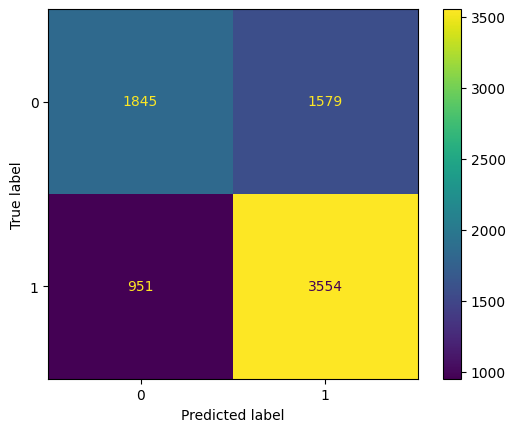

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay(confusion_matrix(y_test,model.predict(X_test))).plot()

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.54      0.59      3424
           1       0.69      0.79      0.74      4505

    accuracy                           0.68      7929
   macro avg       0.68      0.66      0.67      7929
weighted avg       0.68      0.68      0.68      7929



In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'kneighborsregressor__n_neighbors': [100,101,102,103],  # Nombre de voisins
    'kneighborsregressor__weights': ['uniform', 'distance'],  # Méthode de pondération
    'kneighborsregressor__p': [1, 2]  # Distance de Minkowski (1 = Manhattan, 2 = Euclidienne)
}

grid = GridSearchCV(model, param_grid=params, cv=5, scoring='r2')
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         RobustScaler(),
                                                                         Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_rate_positive_w...
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle'],
      dtype='object'))])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__n_neighbors': [100, 101, 102,
                                                              103],
                         'kneighborsregressor__p': [1, 2],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             scoring='r2')

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         RobustScaler(),
                                                                         Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_rate_positive_w...
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle'],
      dtype='object'))])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__n_neighbors': [100, 101, 102,
                                                              103],
                         'kneighborsregressor__p': [1, 2],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             scoring='r2')

In [ ]:
modele=grid.best_estimator_
modele

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_rate_positive_words', ' global_sentiment_pola...
                                                  Index([' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle'],
      dtype='object'))])),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=103, p=1))])

In [ ]:
prediction=modele.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse=mean_squared_error(y_test,prediction)
print(f'Erreur quadratique moyenne Test: {mse}')

r2=r2_score(y_test,prediction)
print(f'Coefficient de détermination Test: {round(r2*100,2)}')
mae=mean_absolute_error(y_test,prediction)
print(f'Erreur absolue moyenne Test: {mae}')

Erreur quadratique moyenne Test: 118148089.2032788
Coefficient de détermination Test: 2.09
Erreur absolue moyenne Test: 2772.940581887553


In [ ]:
predit=grid.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predit)

0.6260562492117543

# **Régression Lasso**

In [ ]:
from sklearn.linear_model import LassoCV
modele1 = LassoCV(cv=5,eps=0.000001,n_alphas=100)
modele1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13885354.215209961, tolerance: 2728584.7614426464
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19895674.405395508, tolerance: 2728584.7614426464
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20824031.141983032, tolerance: 2728584.7614426464
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Converge

LassoCV(cv=5, eps=1e-06)

In [ ]:
modele1.alpha_

1.043184785582428

# **Evaluation des performances du modèle**

In [ ]:
prediction_modele1=modele1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse=mean_squared_error(y_test,prediction_modele1)
print(f'Erreur quadratique moyenne Test: {mse}')

r2=r2_score(y_test,prediction_modele1)
print(f'Coefficient de détermination Test: {round(r2*100,2)}')

mea=mean_absolute_error(y_test,prediction_modele1)
print(f'Erreur absolue moyenne Test: {mea}')

Erreur quadratique moyenne Test: 1057776.616616936
Coefficient de détermination Test: 11.99
Erreur absolue moyenne Test: 765.8370166709972


# **Les coefficients de notre modèle de régression Lasso**

In [ ]:
modele1.coef_

array([ 1.36477964e+02, -1.18798311e+01, -2.58868723e+01, -0.00000000e+00,
        4.57554750e+01, -1.75015887e+00,  2.67902055e+01, -3.65164047e+01,
       -1.43040234e+01, -3.83099682e+00,  0.00000000e+00, -0.00000000e+00,
       -1.08880329e+01,  3.71556532e+01,  3.88388571e+02, -3.89106444e+01,
       -8.98577069e+01, -2.31406687e+02, -2.09516578e+01,  7.73005864e+01,
       -2.46681460e+01, -1.66049757e+01,  5.40483127e+01,  1.12249847e+01,
       -2.39132560e+01,  1.93209550e+00, -1.74717408e+01, -3.94038243e+01,
        2.56842068e+01,  5.00469642e+01, -2.52422914e+00, -2.51435873e+00,
        2.56790836e+01,  1.39849842e-01,  4.47307597e+01, -2.68673059e+01,
       -6.01222556e+00,  0.00000000e+00,  3.64524501e+01,  1.16115293e+01,
        1.55442000e+01,  1.26917681e+01,  3.42691148e+00,  1.69346487e+01,
        2.11741382e+01, -1.02738386e+01, -5.22738205e+01, -4.20730180e+01,
        9.11568424e+01,  1.00348471e+02, -0.00000000e+00,  1.48803659e+01,
       -9.61163983e+00, -

# **Forêt aléatoire**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
modele2 = RandomForestRegressor(n_estimators=100,n_jobs=-1) # n_jobs : Nombre de cœurs à utiliser pour l’entraînement. Utiliser -1 pour exploiter tous les cœurs disponibles.
modele2.fit(X_train, y_train) #n_estimators : Nombre d'arbres dans la forêt.

RandomForestRegressor(n_jobs=-1)

In [ ]:
prédiction_modele2=modele2.predict(X_test)

# **Evaluation des performances du modèle**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse=mean_squared_error(y_test,prédiction_modele2)
print(f'Erreur quadratique moyenne Test: {mse}')
mea=mean_absolute_error(y_test,prédiction_modele2)
print(f'Erreur absolue moyenne Test: {mea}')

Erreur quadratique moyenne Test: 1053665.6055033186
Erreur absolue moyenne Test: 774.3247770972796


# ***Les coefficients de notre modèle forêt aléatoire***

In [ ]:
modele2.feature_importances_

array([3.42387636e-02, 2.97165423e-02, 2.99641502e-02, 2.76859838e-02,
       2.70332892e-02, 9.04446119e-03, 1.04410257e-02, 2.89789384e-02,
       2.38858517e-02, 2.70105657e-02, 2.23499892e-02, 2.60220040e-02,
       2.33763126e-02, 2.88106570e-02, 6.21876215e-02, 3.03894280e-02,
       2.81229257e-02, 3.33128667e-02, 1.54083171e-03, 2.41125188e-02,
       2.06452545e-02, 1.38099488e-02, 1.29724468e-03, 1.30183341e-02,
       8.32870618e-03, 1.07478206e-02, 1.32767581e-02, 2.63838473e-02,
       5.76016154e-05, 2.93422685e-02, 1.72438441e-02, 2.76731212e-02,
       2.22034994e-02, 1.40009289e-02, 5.64254279e-03, 1.31957544e-02,
       7.89821356e-03, 1.19594836e-02, 1.21030353e-02, 2.57315055e-02,
       1.81794563e-02, 2.57907120e-02, 3.86636709e-02, 1.42380221e-02,
       1.18567647e-02, 1.32017465e-03, 1.24563455e-02, 1.00115135e-03,
       1.14327261e-02, 1.10662589e-02, 9.82651815e-04, 2.44161136e-03,
       2.37032254e-03, 2.40573432e-03, 3.14186528e-03, 1.37065839e-03,
      

In [ ]:
Q1 = df[" shares"].quantile(0.25)
Q3 = df[" shares"].quantile(0.75)
IQR = Q3 - Q1

# ***KNN***

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 100)}
modele3_grid = GridSearchCV(KNeighborsRegressor(weights='distance',    # Pondération par distance
    algorithm='auto',      # Choix automatique de l'algorithme
    leaf_size=30,          # Taille de la feuille pour ball_tree ou kd_tree
    p=2,                   # Utilisation de la distance euclidienne
    metric='minkowski',    # Distance Minkowski
    n_jobs=-1), param_grid, cv=5, scoring='r2')              # Utilisation de tous les coeurs disponibles)
modele3_grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1, weights='distance'),
             param_grid={'n_neighbors': range(1, 100)}, scoring='r2')

In [ ]:
modele3_grid.best_params_

{'n_neighbors': 99}

In [ ]:
prediction_modele3=modele3_grid.predict(X_test)

# **Evaluation des performances du modèle**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mse=mean_squared_error(y_test,prediction_modele3)
print(f'Erreur quadratique moyenne Test: {mse}')
r2=r2_score(y_test,prediction_modele3)
print(f'Coefficient de détermination Test: {round(r2*100,2)}')
mea=mean_absolute_error(y_test,prediction_modele3)
print(f'Erreur absolue moyenne Test: {mea}')

Erreur quadratique moyenne Test: 1076002.3988117848
Coefficient de détermination Test: 10.47
Erreur absolue moyenne Test: 759.6097334985951


# **Par ACP**